![](https://imgur.com/orZWHly.png)

source: @allison_horst https://github.com/allisonhorst/penguins

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis[[source:WIkipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)]

Palmer Archipelago (Antarctica) penguin dataset appears to be a drop in replacemnt for the same. It is a great intro dataset for data exploration & visualization. Let's import the dataset and explore it to understand it better.

In [1]:

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')





ModuleNotFoundError: No module named 'sklearn'

# Reading in the dataset

In [ ]:
df = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns. 

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **culmen_length_mm**: culmen length (mm)
* **culmen_depth_mm**: culmen depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **sex**: penguin sex

## What are culmen length & depth?
The culmen is "the upper ridge of a bird's beak" 

![](https://github.com/allisonhorst/penguins/raw/master/figures/culmen_depth.png)


## What are flippers?
Penguins wings are called flippers. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip

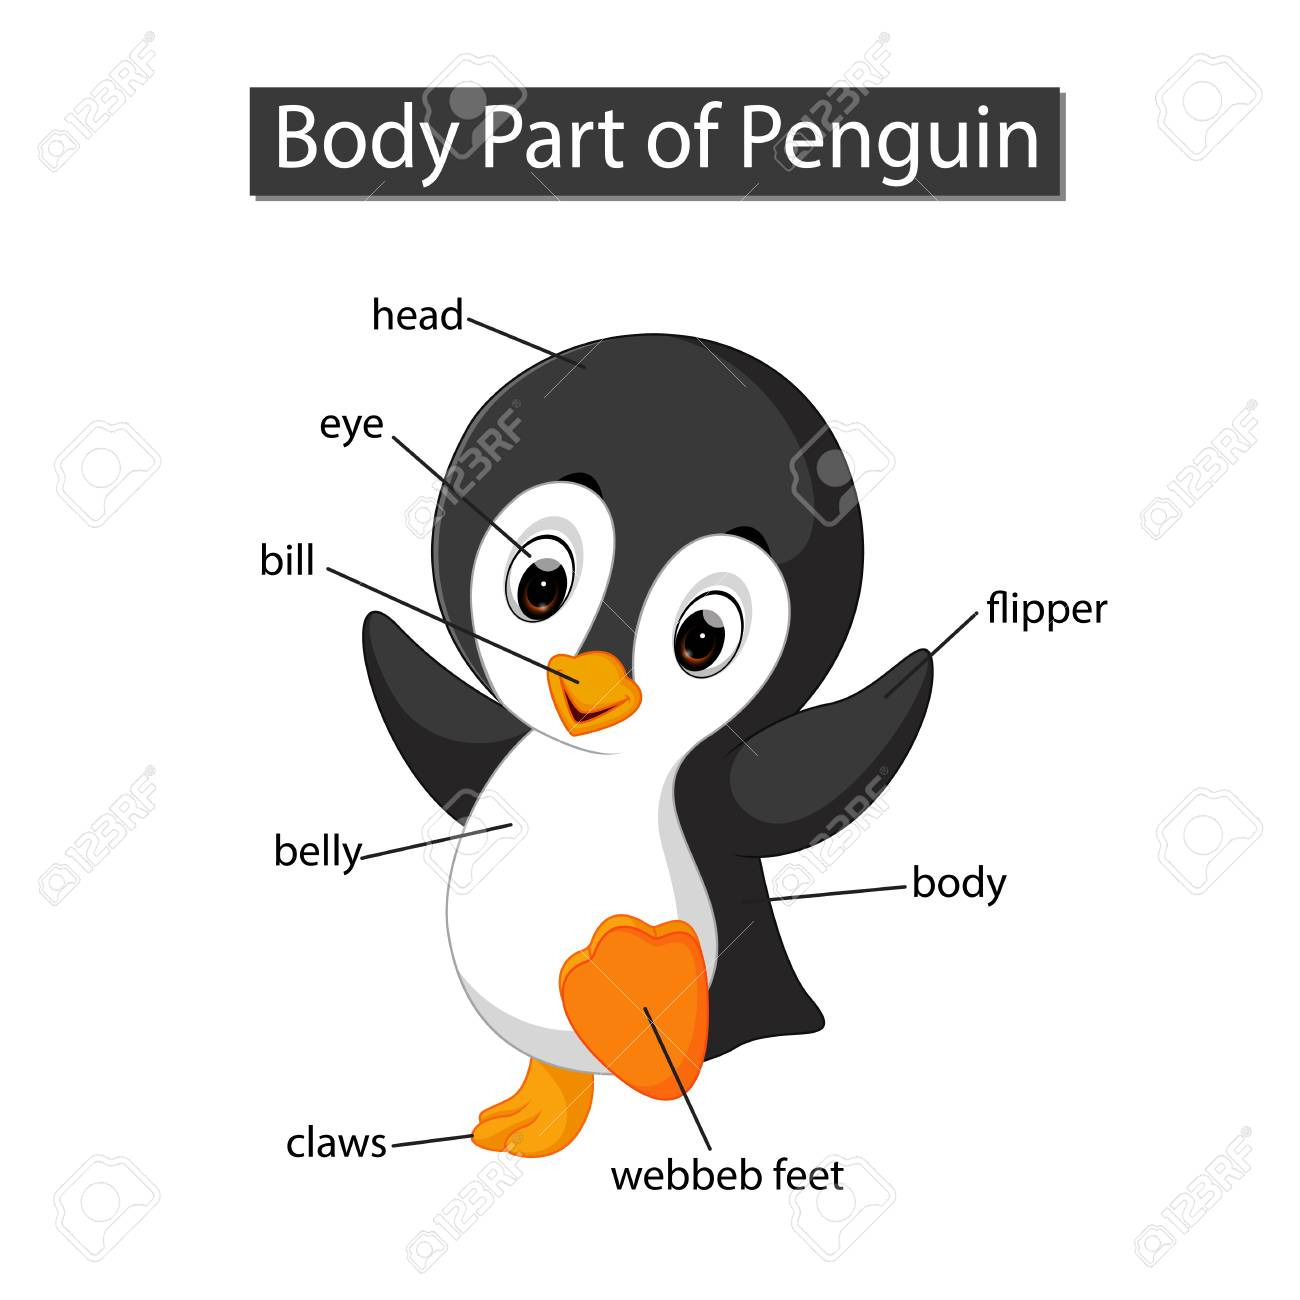

# Understanding the data



In [ ]:
print(df.shape)

(344, 7)


In [ ]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Covariance & Correlation

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. 
Source: https://tinyurl.com/yd2pezss

In [ ]:
# Covariance

print('Covariance:')
df.cov()

Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [ ]:
print('Correlation:')
df.corr()

Correlation:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [ ]:

# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Missing values

In [ ]:
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [ ]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Convert sex column to integer values

In [ ]:
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df['sex'][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int64

# Analysing the data visually

## Number of Species

In [ ]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Unlike, Iris dataset which has equal number of all the species of flowers(50 each), the penguins dataset has different number of samples for each species.

In [ ]:
df['species'].value_counts().iplot(kind='bar')

# Boxplot

The box plot of the dataset,will show us the visual representation of how our data is scattered over the the plane

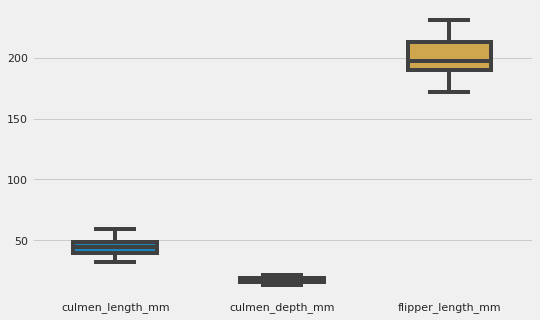

In [ ]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

# Scatterplot
The scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

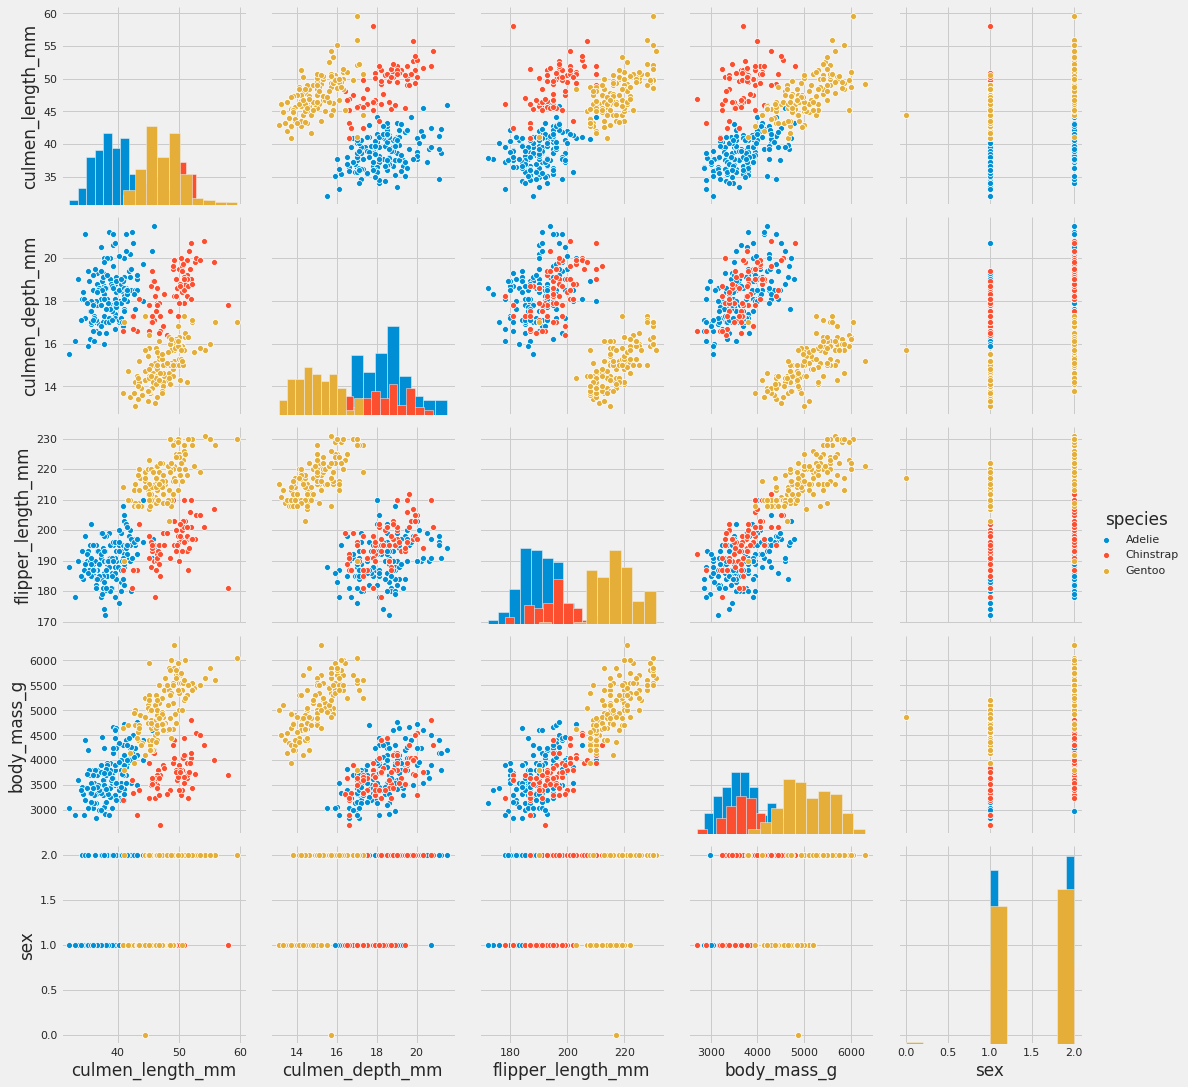

In [ ]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

## culmen_depth vs culmen_length

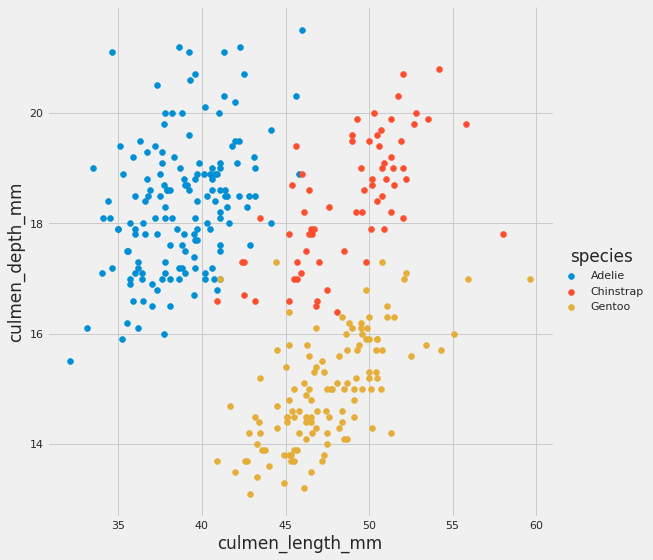

In [ ]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

## culmen_depth vs flipperlength


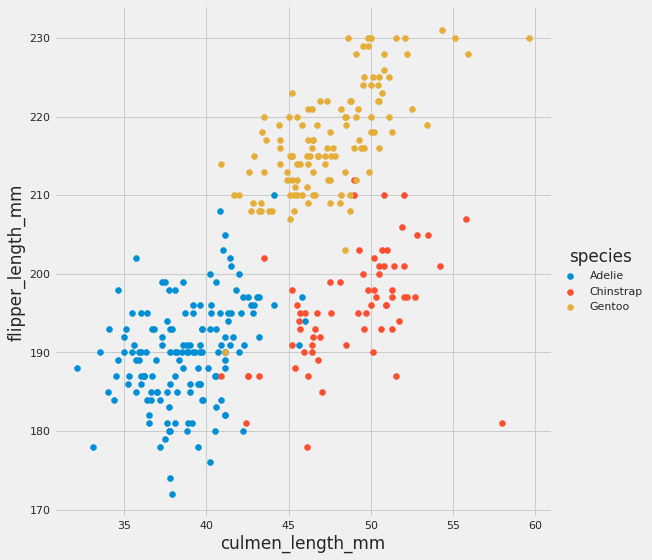

In [ ]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

# Flipperlength distribution

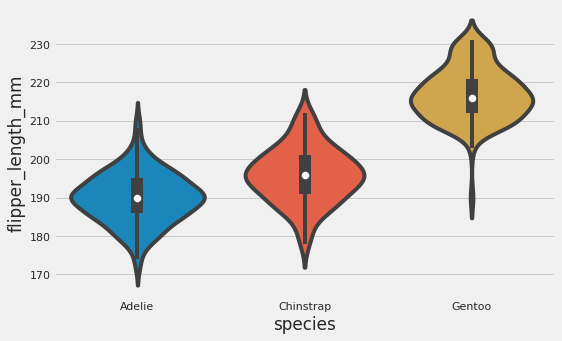

In [ ]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)


## KDEPlot

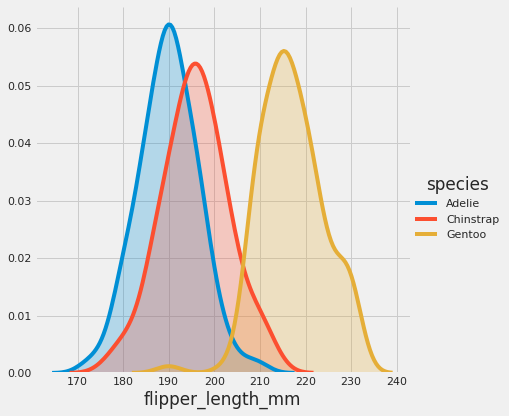

In [ ]:
sns.FacetGrid(df, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

## Flipper length vs. body mass


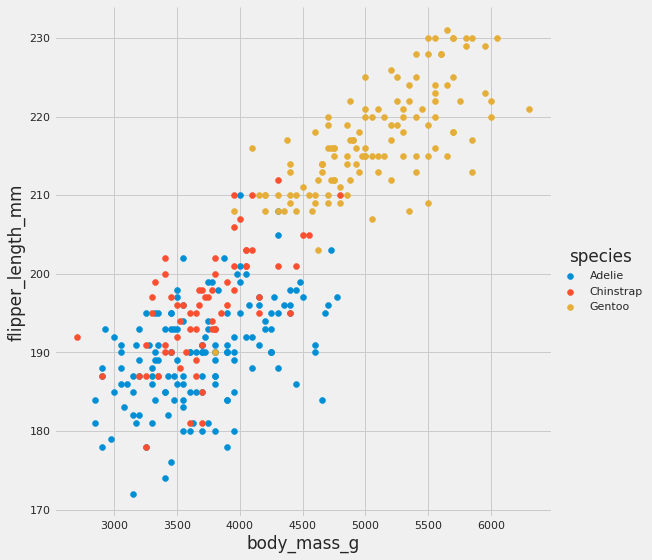

In [ ]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

# UMAP

To use UMAP for this task we need to first construct a UMAP object that will do the job for us

In [ ]:
import umap
reducer = umap.UMAP()

In [ ]:
penguin_data = df[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [ ]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(344, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

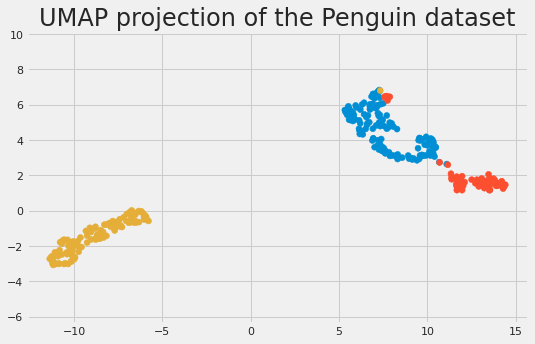

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)